## EDA: Failure Analysis in Power Transformers Dataset
https://www.kaggle.com/datasets/shashwatwork/failure-analysis-in-power-transformers-dataset/data

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
failure_data = pd.read_csv("failure_data/Health index1.csv")
failure_data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043,33.010426
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458,17.791047
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000,6.000000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000,19.000000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000,32.000000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000,51.000000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000,51.000000


### Methodology for Calculating Health Index Based on Dissolved Gas Analysis Reports
**Dissolved Gas Analysis (DGA)** is a crucial technique for assessing the internal condition of electrical transformers. By analyzing the concentrations of specific gases dissolved in the transformer's insulating oil, it's possible to identify potential faults or degradation.

The faults that occur within transformer are broadly classified into two types namely 

    (i) internal incipient faults and 
    
    (ii) internal short circuit faults. 
    
The majority of incipient faults occurring in a power transformer give advance warning of a major break-down through the transformer oil gas analysis. During this period, the transformer may function well but it may cause some serious problems with insulation deterioration. The fault detection techniques such as dissolved gas analysis (DGA) [1], [2] and partial discharge analysis [3] are currently used for detection of incipient faults.

DGA is one of the earliest tool for the detection of incipient faults in transformers. Hydrocarbon oils are used as insulating fluids in transformers because of their high dielectric strength, heat transfer properties and chemical stability. Insulating material will decompose under the stress caused by thermal and electrical overload. The decomposition generates gaseous products, which dissolve in mineral oil. The nature and the amount of the individual gases extracted from the oil may be indicative of the type and degree of abnormality.

* Key Gases and Their Significance:

    **Hydrogen (H2):** Indicates overheating due to high currents or overloading.

    **Oxygen (O2):** Indicates exposure to air, possibly due to leaks or damaged seals.

    **Nitrogen (N2):** Can indicate exposure to air, but is also present in the transformer's insulating oil.

    **Methane (CH4):** Indicates overheating or arcing within the transformer.

    **Carbon Monoxide (CO):** Indicates overheating, arcing, or corona discharge.

    **Carbon Dioxide (CO2):** Indicates overheating or arcing, but can also be a product of oxidation.

    **Ethylene (C2H4):** Indicates overheating or arcing, especially in the presence of paper insulation.

    **Ethane (C2H6):** Indicates overheating or arcing, but is less sensitive than ethylene.

    **Acetylene (C2H2):** Indicates severe arcing or short circuits.

    **DBDS:** Indicates the presence of sulfur-containing compounds, which can be a sign of insulation degradation.

    **Power Factor:** Measures the energy loss in the transformer's insulation.

    **Interfacial Voltage:** Measures the ability of the insulating oil to withstand electrical stress.

    **Dielectric Rigidity:** Measures the ability of the insulating oil to withstand an electric field without breaking down.

    **Water Content:** Measures the amount of water present in the insulating oil, which can reduce its dielectric strength.

* Health Index Calculation Methodology:

1. Data Normalization: Normalize the gas concentrations to a common reference (e.g., ppm) to ensure comparability.
2. Weighting: Assign weights to each gas based on its sensitivity to different fault types. For example, acetylene might have a higher weight due to its strong association with severe arcing.
3. Gas Ratio Analysis: Calculate ratios between specific gases to identify fault patterns 

Health Index Calculation: 

* Combine the normalized gas concentrations, weighted values, and fault classification results into a single health index. This index can be calculated using various methods, such as:
* Weighted Sum: Sum the weighted gas concentrations and normalized ratios.
* Fuzzy Logic: Use fuzzy logic rules to combine the gas concentrations and fault classifications into a single index.
* Machine Learning: Train a machine learning model on historical DGA data to predict a health index based on the gas concentrations and other relevant features.

Additional Considerations:

__Trending Analysis:__ Track changes in the health index over time to identify deteriorating conditions.

__Thresholds:__ Establish thresholds for the health index to trigger maintenance or inspections.

__Contextual Factors:__ Consider other factors, such as transformer age, load, and operating environment, when interpreting the health index.

__Expert Knowledge:__ Incorporate expert knowledge and experience to refine the health index calculation and interpretation.
By following this methodology and considering the specific factors relevant to your application, you can effectively use DGA reports to assess the health of power transformers and make informed maintenance decisions.

In [98]:
print(failure_data.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index',
       'Life expectation'],
      dtype='object')


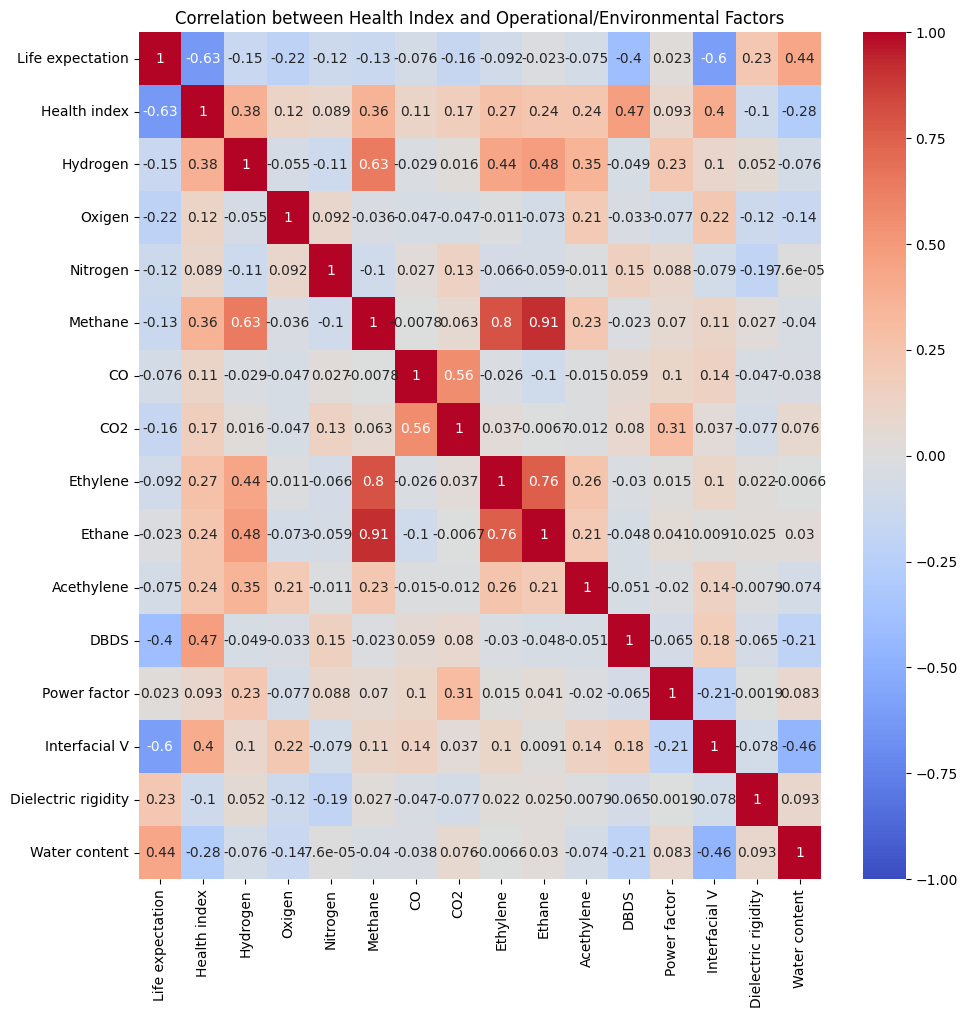

In [99]:
# For dissolved gas analysis, certain patterns of gas levels and ratios are indicative of different faults. 
# Explore Correlations
# Checking correlations for relevant numeric features (Health Index, Load, Environmental conditions, Operating hours)
correlation_matrix = failure_data[['Life expectation', 'Health index', 'Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene','Ethane', 'Acethylene', 'DBDS',
                                     'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Health Index and Operational/Environmental Factors')
plt.show()

In [103]:
# Explore low health index data (Good Transformer conditions)
df_low_hidx = failure_data[failure_data["Health index"] < 60]
df_low_hidx.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,163.589286,8388.738839,47853.080357,17.964286,242.633929,1782.470982,20.098214,50.004464,42.071429,16.310714,1.784241,38.272321,53.444196,16.502232,25.429911,33.986607
std,1065.446827,14396.756622,13857.735026,78.591850,230.725148,2029.377973,137.082640,127.922970,384.554740,45.754314,5.990530,6.169271,6.313688,17.115740,15.239693,17.597175
min,0.000000,57.000000,3600.000000,0.000000,10.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,1.000000,13.400000,6.000000
25%,3.000000,491.250000,41975.000000,2.000000,63.750000,629.750000,0.000000,0.000000,0.000000,0.000000,0.547500,32.000000,51.000000,5.000000,13.400000,19.000000
50%,9.000000,3810.000000,49300.000000,3.000000,146.000000,1105.000000,3.000000,3.000000,0.000000,0.000000,1.000000,38.000000,54.000000,12.000000,13.400000,32.000000
75%,29.000000,14902.000000,55825.000000,6.000000,365.000000,2300.000000,5.250000,64.250000,0.000000,2.000000,1.000000,44.000000,56.000000,22.000000,38.300000,51.000000
max,12880.000000,249900.000000,85300.000000,1061.000000,1070.000000,24200.000000,2250.000000,1850.000000,4830.000000,227.000000,73.200000,57.000000,75.000000,183.000000,59.300000,51.000000


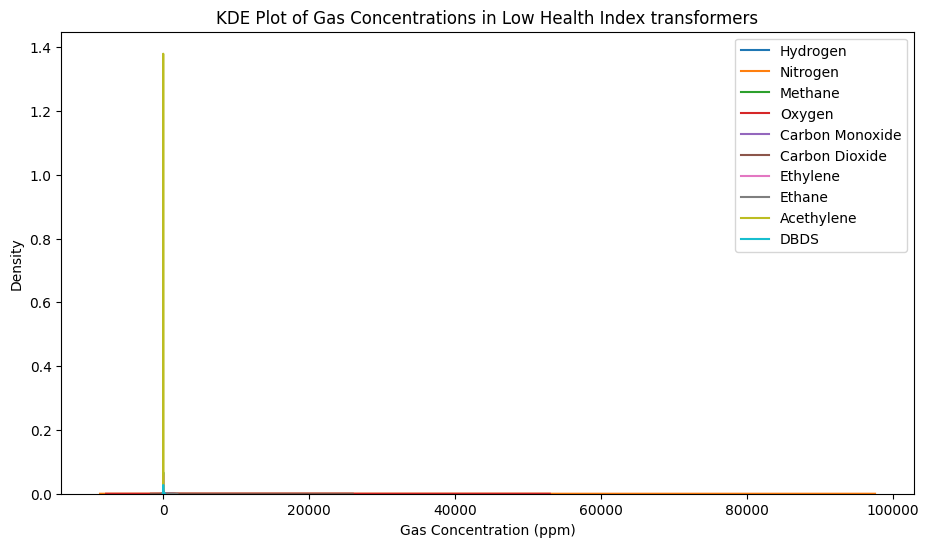

In [101]:
plt.figure(figsize=(11, 6))
sns.kdeplot(data=df_low_hidx, x="Hydrogen", label="Hydrogen")
sns.kdeplot(data=df_low_hidx, x="Nitrogen", label="Nitrogen")
sns.kdeplot(data=df_low_hidx, x="Methane", label="Methane")
sns.kdeplot(data=df_low_hidx, x="Oxigen", label="Oxygen")
sns.kdeplot(data=df_low_hidx, x="CO", label="Carbon Monoxide")
sns.kdeplot(data=df_low_hidx, x="CO2", label="Carbon Dioxide")
sns.kdeplot(data=df_low_hidx, x="Ethylene", label="Ethylene")
sns.kdeplot(data=df_low_hidx, x="Ethane", label="Ethane")
sns.kdeplot(data=df_low_hidx, x="Acethylene", label="Acethylene")
sns.kdeplot(data=df_low_hidx, x="DBDS", label="DBDS")
plt.xlabel("Gas Concentration (ppm)")
plt.ylabel("Density")
plt.title("KDE Plot of Gas Concentrations in Low Health Index transformers")
plt.legend()
plt.show()

In [104]:
# explore high health index data (Bad Transformer conditions)
df_high_hidx = failure_data[failure_data["Health index"] >= 60]
df_high_hidx.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5305.227273,7718.636364,45855.181818,1336.772727,271.818182,2507.636364,3071.363636,732.272727,1097.863636,31.818182,3.168636,41.727273,54.545455,11.818182,69.740909,13.131818
std,6242.023206,8268.628150,11712.839502,1865.235742,351.138100,5055.522266,5426.015328,1344.548612,2238.764398,63.077908,8.790617,5.530709,9.053951,16.879507,11.197137,6.582183
min,3.000000,61.000000,25041.000000,0.000000,32.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.250000,24.000000,29.000000,0.000000,60.500000,6.000000
25%,513.500000,1307.500000,36755.000000,46.500000,93.500000,922.500000,5.000000,14.000000,1.250000,0.000000,0.680000,40.250000,52.000000,4.000000,60.500000,6.000000
50%,2832.500000,4050.000000,47700.000000,615.500000,183.500000,1455.000000,117.500000,165.000000,12.500000,1.000000,1.000000,43.000000,55.000000,5.500000,63.400000,19.000000
75%,8957.500000,11900.000000,55200.000000,1767.500000,329.750000,2112.500000,2460.000000,725.750000,1495.000000,15.500000,1.000000,45.000000,55.750000,14.750000,75.600000,19.000000
max,23349.000000,26100.000000,63900.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,205.000000,42.100000,52.000000,72.000000,77.000000,95.200000,19.000000


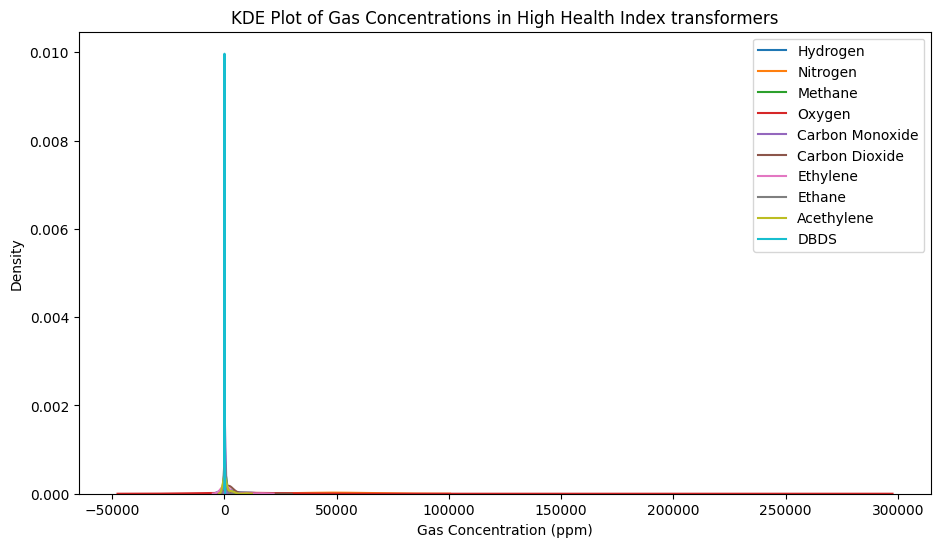

In [14]:
plt.figure(figsize=(11, 6))
sns.kdeplot(data=df_high_hidx, x="Hydrogen", label="Hydrogen")
sns.kdeplot(data=df_high_hidx, x="Nitrogen", label="Nitrogen")
sns.kdeplot(data=df_high_hidx, x="Methane", label="Methane")
sns.kdeplot(data=df_high_hidx, x="Oxigen", label="Oxygen")
sns.kdeplot(data=df_high_hidx, x="CO", label="Carbon Monoxide")
sns.kdeplot(data=df_high_hidx, x="CO2", label="Carbon Dioxide")
sns.kdeplot(data=df_high_hidx, x="Ethylene", label="Ethylene")
sns.kdeplot(data=df_high_hidx, x="Ethane", label="Ethane")
sns.kdeplot(data=df_high_hidx, x="Acethylene", label="Acethylene")
sns.kdeplot(data=df_high_hidx, x="DBDS", label="DBDS")
plt.xlabel("Gas Concentration (ppm)")
plt.ylabel("Density")
plt.title("KDE Plot of Gas Concentrations in High Health Index transformers")
plt.legend()
plt.show()

In [18]:
# print the unique values in the "Health index" column of health_index_augdata
print(np.sort(failure_data["Health index"].unique()))

[13.4 13.5 13.6 13.7 13.8 13.9 16.2 16.6 17.5 19.5 19.8 21.6 21.7 21.9
 22.5 23.  26.6 26.7 28.1 31.  33.6 36.4 36.6 38.  38.1 38.3 38.4 38.6
 40.  45.3 46.6 47.9 48.1 48.2 48.3 48.5 48.9 49.  49.1 49.2 49.9 50.
 50.3 50.6 50.7 51.5 51.6 55.1 55.8 56.  57.4 58.  58.3 59.3 60.5 61.3
 63.4 68.  72.8 73.2 75.6 85.2 85.3 85.5 95.2]


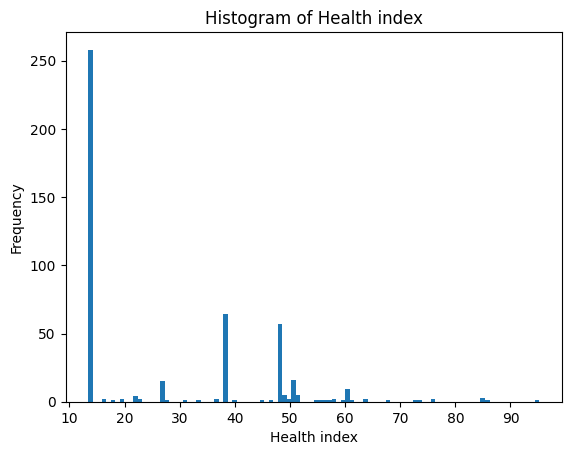

In [19]:
# plot a histogram of "HealthIndex" column
plt.hist(failure_data["Health index"], bins=100)
plt.xlabel("Health index")
plt.ylabel("Frequency")
plt.title("Histogram of Health index")
plt.show()

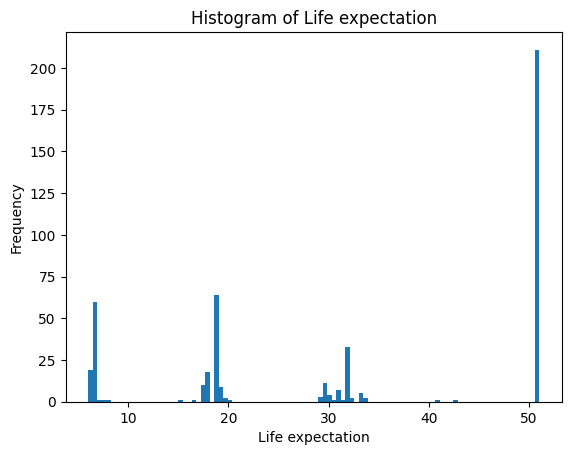

In [107]:
# plot a histogram of ""Life expectation" column
plt.hist(failure_data["Life expectation"], bins=100)
plt.xlabel("Life expectation")
plt.ylabel("Frequency")
plt.title("Histogram of Life expectation")
plt.show()

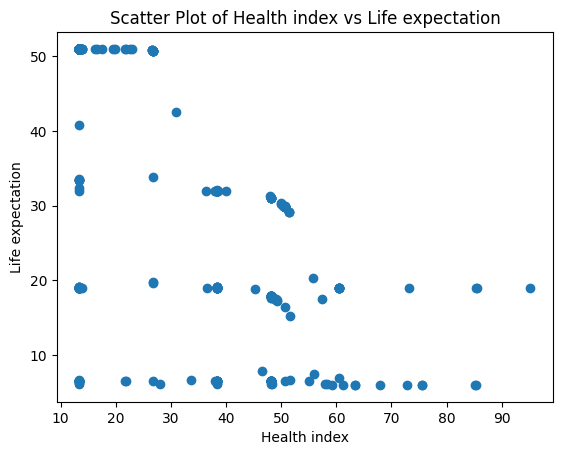

In [23]:
# plot a scatter plot of "Health index" and "Age" columns from combined_data
plt.scatter(failure_data["Health index"], failure_data["Life expectation"])
plt.xlabel("Health index")
plt.ylabel("Life expectation")
plt.title("Scatter Plot of Health index vs Life expectation")
plt.show()

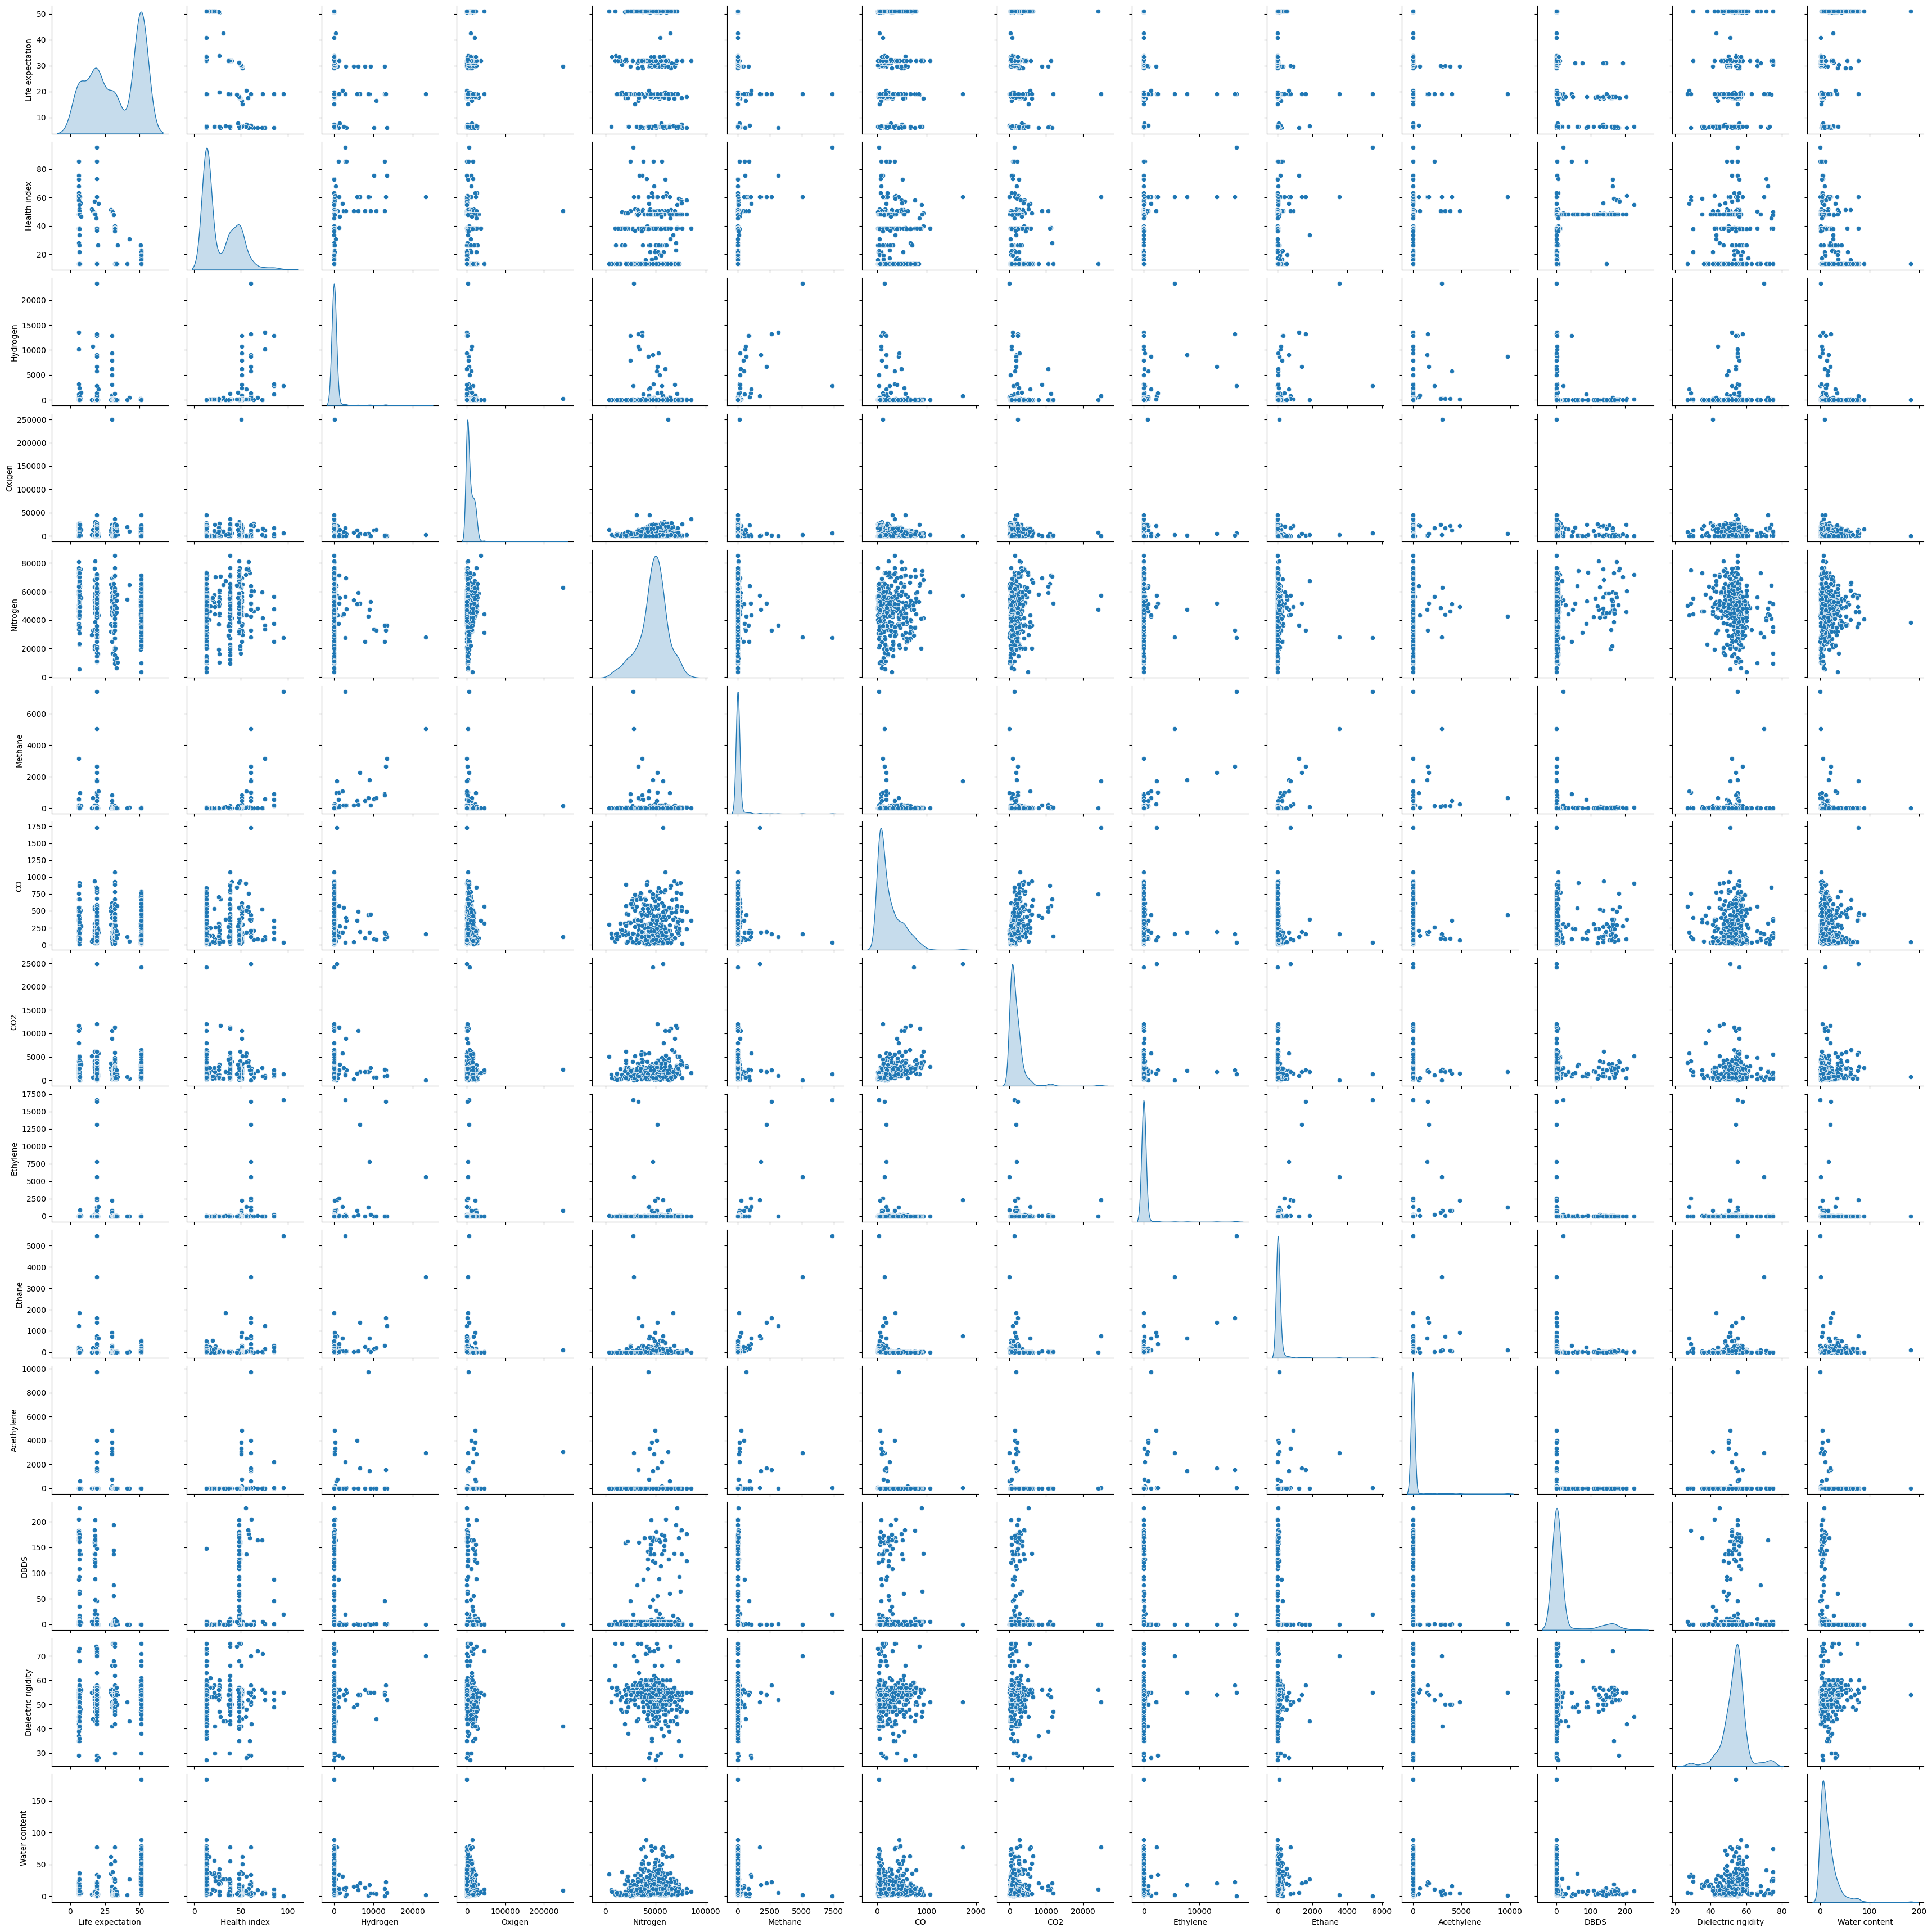

In [109]:
# plot pair plot of health index with all DGA gas columns
sns.pairplot(failure_data, vars=["Life expectation", "Health index", "Hydrogen", "Oxigen", "Nitrogen", "Methane", "CO", "CO2", "Ethylene", "Ethane", "Acethylene", "DBDS", "Dielectric rigidity", "Water content"], 
             diag_kind="kde")
plt.show()

array([<Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>,
       <Axes: xlabel='Life expectation'>], dtype=object)

<Figure size 1200x1000 with 0 Axes>

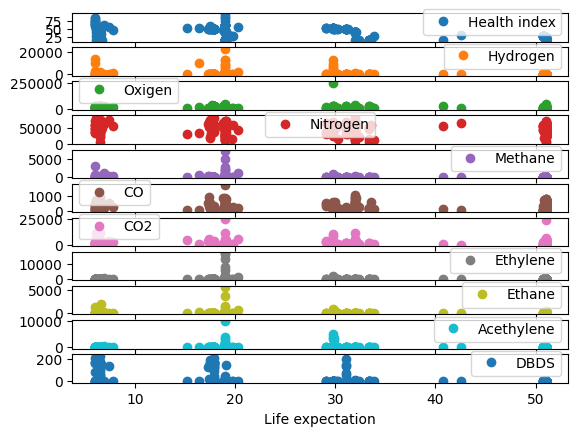

In [110]:
plt.figure(figsize=(12, 10))
failure_data.plot(kind="line", x="Life expectation", y=["Health index","Hydrogen","Oxigen","Nitrogen", 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS'], 
                  subplots=True, sharex=True, ls="none", marker="o")


In [112]:
# Build a RF to predict "Life expectation"
# Select relevant features and the target  
X = failure_data.drop("Life expectation", axis=1)  # Predictor variables
y = failure_data['Life expectation']  # Target variable

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 46.894982000851115
Random Forest R-squared: 0.8350052469380066


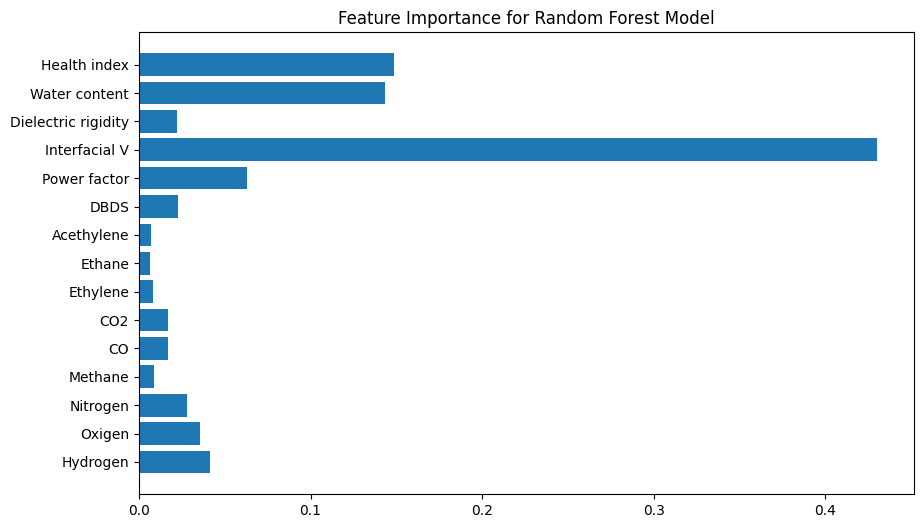

In [115]:
## To understand which features are contributing the most to the model's predictions, you can calculate feature importance.
# Feature Importance for Random Forest
# Get feature importance scores
importance = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.title('Feature Importance for Random Forest Model')
plt.show()

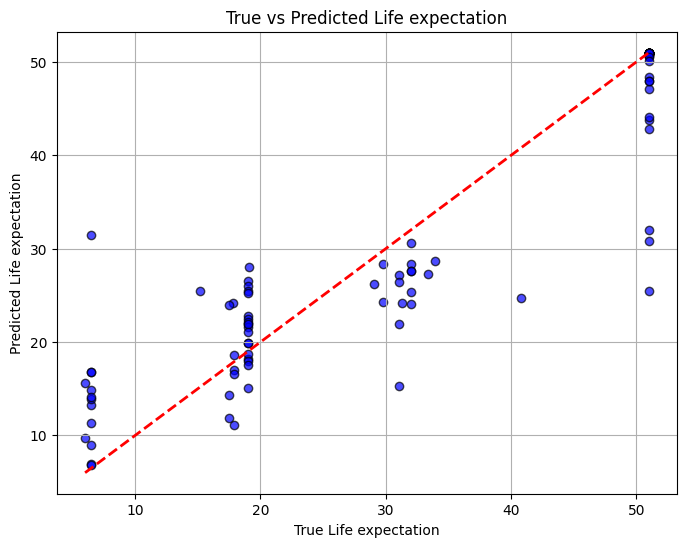

In [117]:
# y_test contains the true health index values
# y_pred_best_rf contains the predicted values from the best model
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Reference line (y = x)
plt.title('True vs Predicted Life expectation')
plt.xlabel('True Life expectation')
plt.ylabel('Predicted Life expectation')
plt.grid(True)
plt.show()


Gas Ratio Analysis: Calculate ratios between specific gases to identify fault patterns. Common ratios include:

**Gas Ratios Related to Overheating and Arcing:**
* __CO/H2:__  Indicates the severity of overheating.
* __CH4/H2:__  Indicates the type of fault (overheating or arcing).
* __C2H4/H2:__ Indicates the severity of overheating in paper-insulated transformers.

**Gas Ratios Related to Insulation Degradation:**
* __H2/N2:__ This ratio can provide information about the overall condition of the insulation. A higher value might suggest insulation degradation or exposure to air.
* __O2/N2:__ This ratio can indicate the presence of air in the transformer, which can lead to oxidation and insulation degradation.

**Gas Ratios Related to Moisture:**
* __H2/CO2:__ A high value of this ratio can suggest the presence of moisture in the transformer, which can reduce the dielectric strength of the insulating oil.

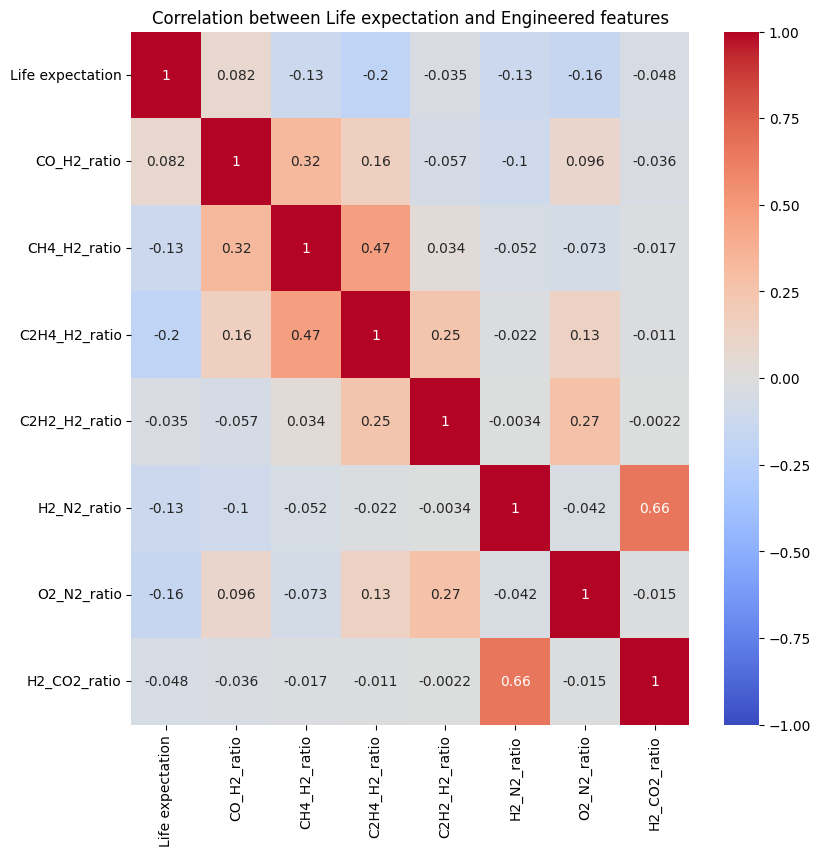

In [128]:
# Feature engineering
# Calculate gas ratios related to Overheating and arcing
failure_data['CO_H2_ratio'] = [failure_data['CO'][i]/failure_data['Hydrogen'][i] if failure_data['Hydrogen'][i] != 0 else 0 for i in range(len(failure_data))]
failure_data['CH4_H2_ratio'] = [failure_data['Methane'][i]/failure_data['Hydrogen'][i] if failure_data['Hydrogen'][i] != 0 else 0 for i in range(len(failure_data))] 
failure_data['C2H4_H2_ratio'] = [failure_data['Ethylene'][i]/failure_data['Hydrogen'][i] if failure_data['Hydrogen'][i] != 0 else 0 for i in range(len(failure_data))]  
failure_data['C2H2_H2_ratio'] = [failure_data['Acethylene'][i]/failure_data['Hydrogen'][i] if failure_data['Hydrogen'][i] != 0 else 0 for i in range(len(failure_data))]  

# Calculate gas ratios related to Insulation Degradation
failure_data['H2_N2_ratio'] = [failure_data['Hydrogen'][i]/failure_data['Nitrogen'][i] if failure_data['Nitrogen'][i] != 0 else 0 for i in range(len(failure_data))]  
failure_data['O2_N2_ratio'] = [failure_data['Oxigen'][i]/failure_data['Nitrogen'][i] if failure_data['Nitrogen'][i] != 0 else 0 for i in range(len(failure_data))]  

# Calculate gas ratios related to Moisture
failure_data['H2_CO2_ratio'] = [failure_data['Hydrogen'][i]/failure_data['CO2'][i] if failure_data['CO2'][i] != 0 else 0 for i in range(len(failure_data))]  

# Checking correlations for relevant numeric features (Health Index, Load, Environmental conditions, Operating hours)
correlation_matrix = failure_data[['Life expectation', 'CO_H2_ratio', 'CH4_H2_ratio', 'C2H4_H2_ratio', 'C2H2_H2_ratio', 
                                   'H2_N2_ratio', 'O2_N2_ratio', 'H2_CO2_ratio']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Life expectation and Engineered features')
plt.show()

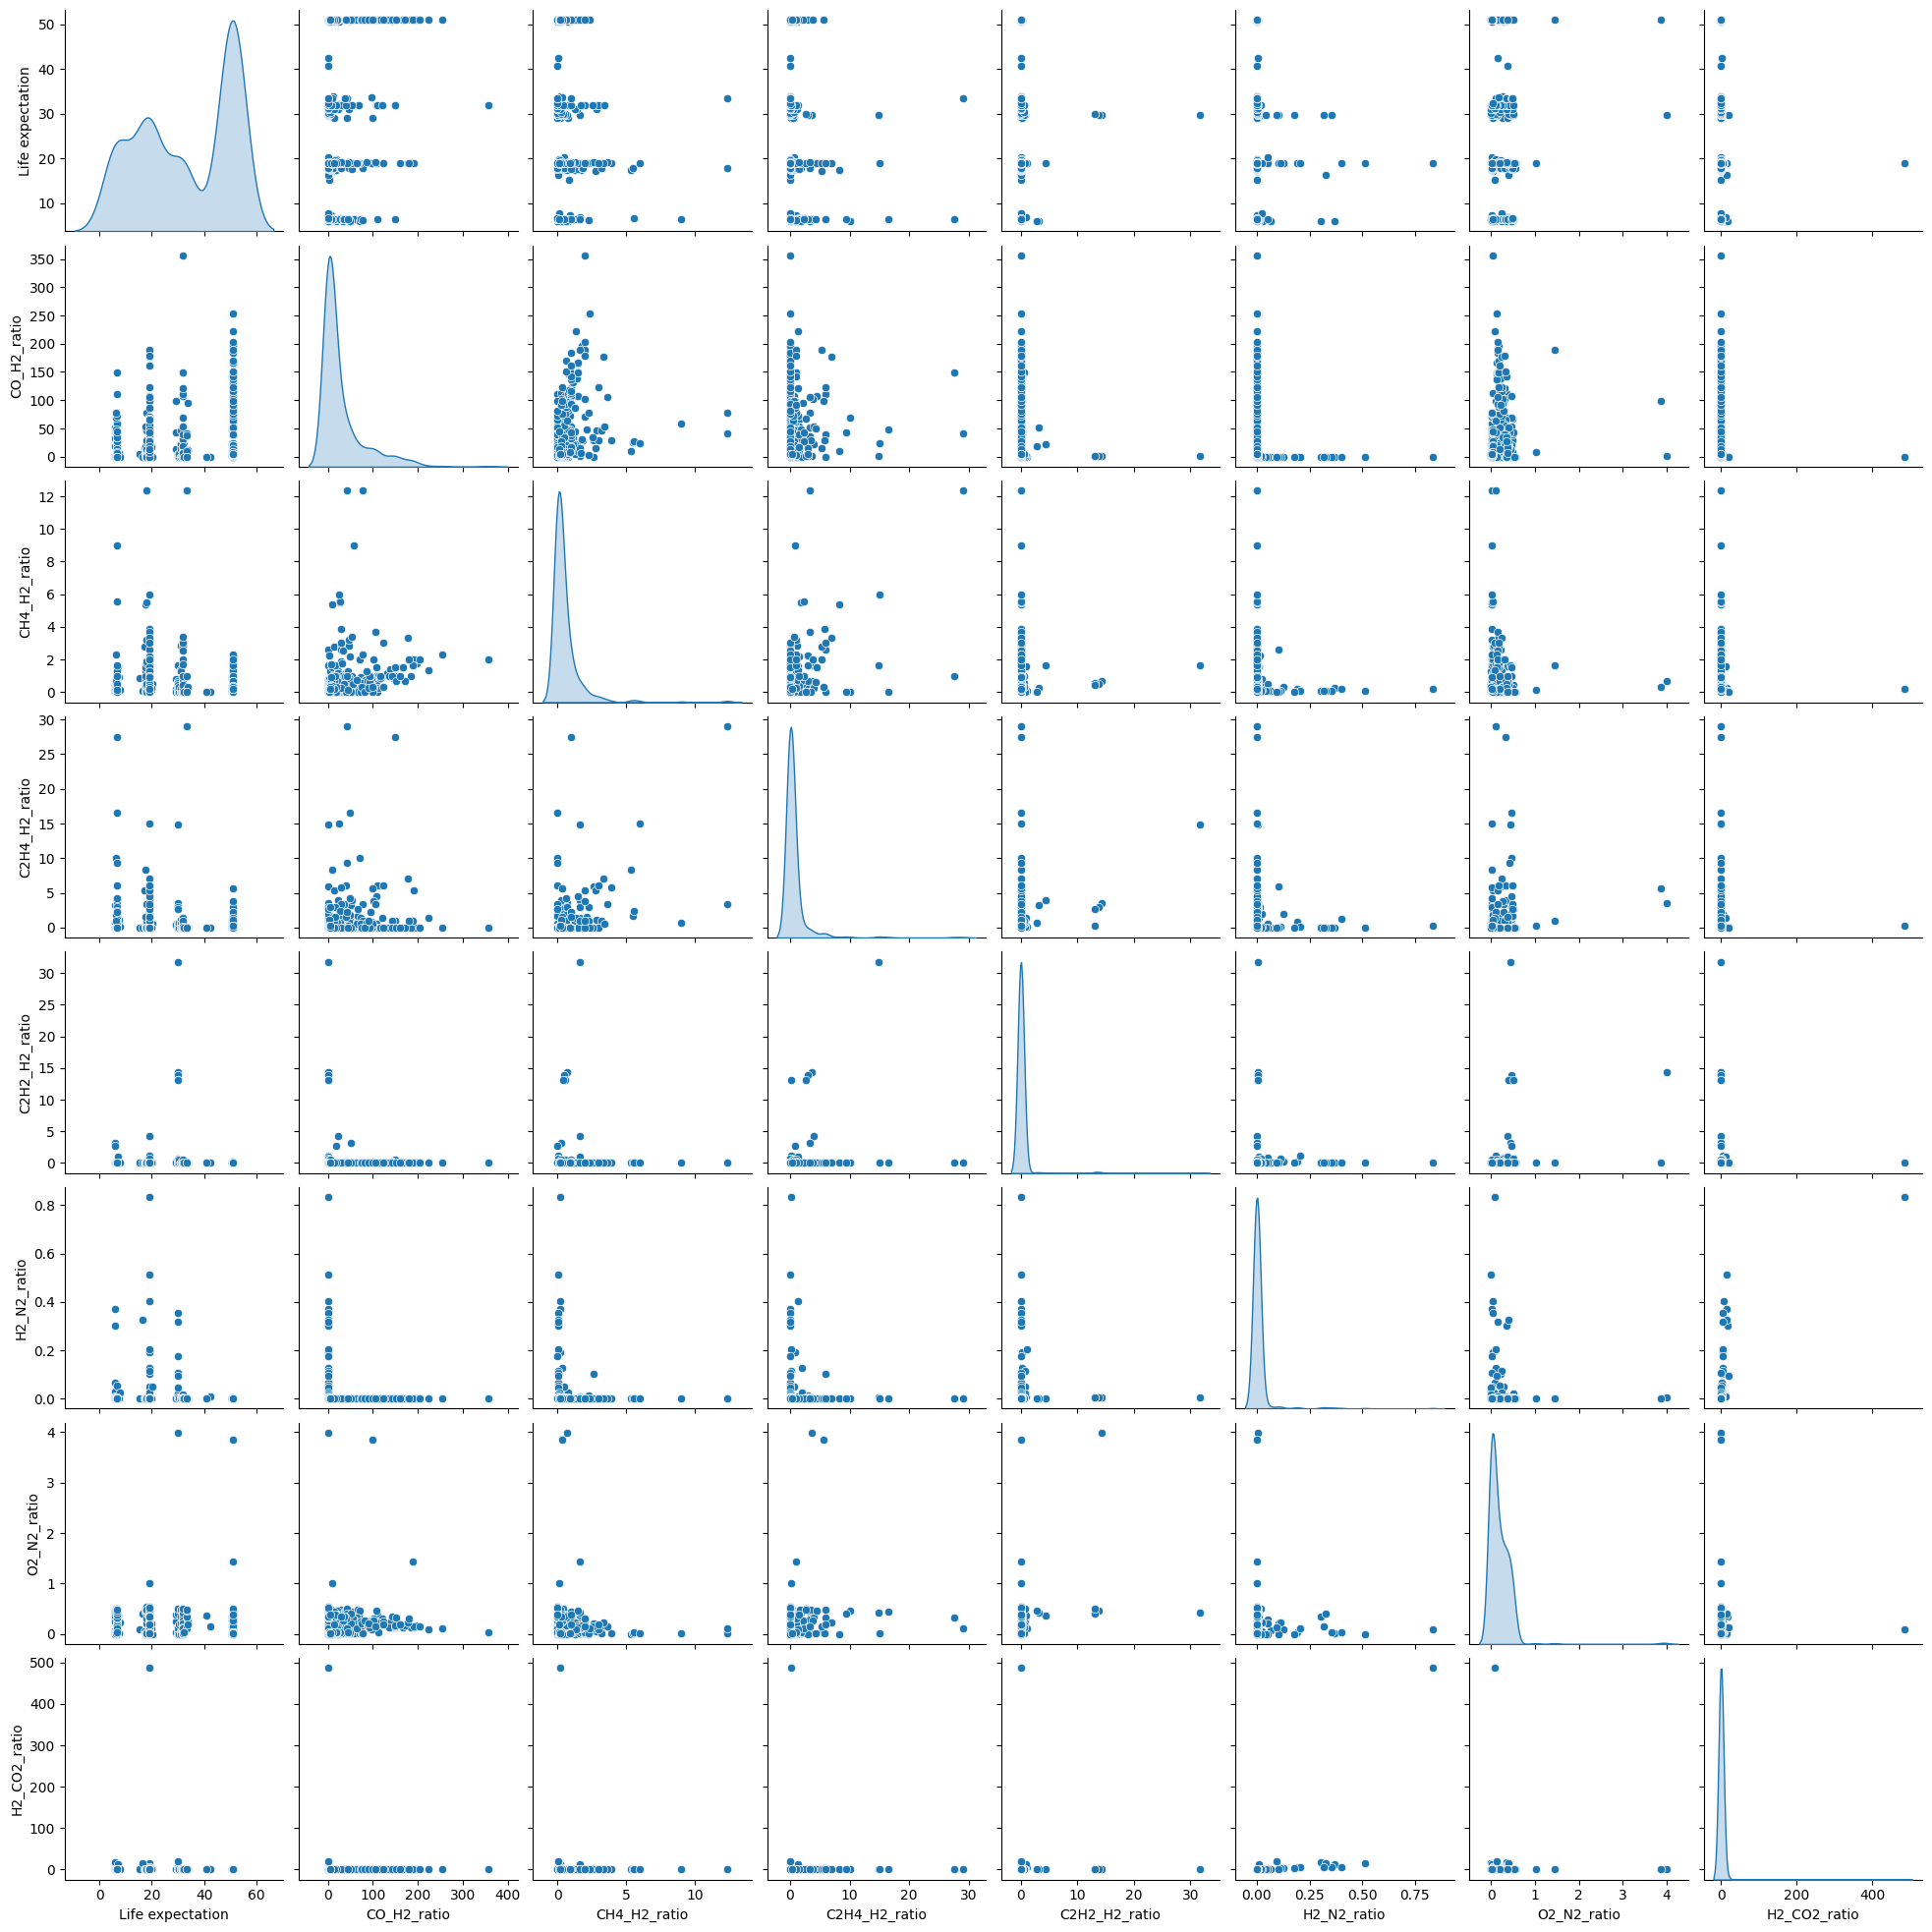

In [119]:
# plot pair plot of health index with all DGA gas columns
sns.pairplot(failure_data, vars=['Life expectation','CO_H2_ratio', 'CH4_H2_ratio', 'C2H4_H2_ratio', 'C2H2_H2_ratio', 'H2_N2_ratio', 'O2_N2_ratio', 'H2_CO2_ratio'], 
             diag_kind="kde")
plt.show()

In [122]:
full_failure_data = failure_data.drop("Life expectation", axis=1)  # Predictor variables
print(full_failure_data.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index', 'CO_H2_ratio',
       'CH4_H2_ratio', 'C2H4_H2_ratio', 'C2H2_H2_ratio', 'H2_N2_ratio',
       'O2_N2_ratio', 'H2_CO2_ratio'],
      dtype='object')


In [125]:
# Select Features:
# Select relevant features and the target (Life expectation)
features = full_failure_data.columns

X = full_failure_data   # Predictor variables
y = failure_data['Life expectation']  # Target variable

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 44.74670951063829
Random Forest R-squared: 0.8425637035981692


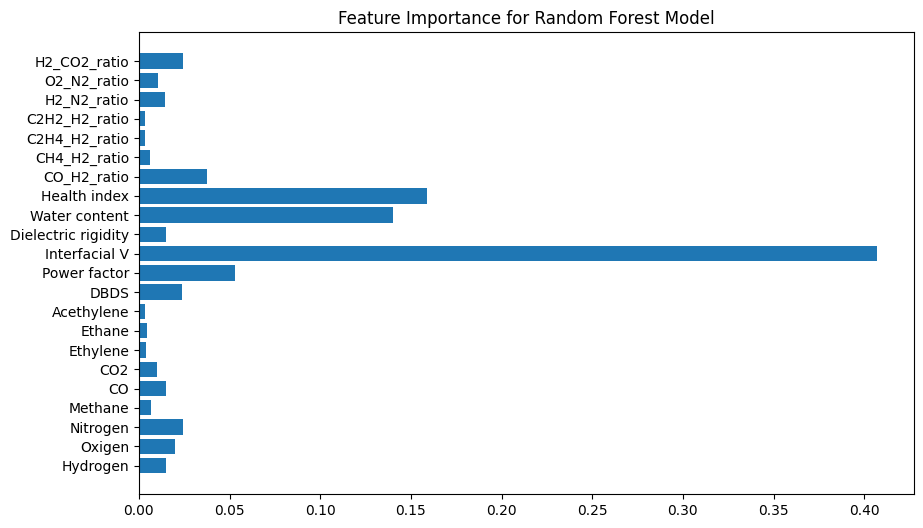

In [129]:
## To understand which features are contributing the most to the model's predictions, you can calculate feature importance.
# Feature Importance for Random Forest
# Get feature importance scores
importance = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title('Feature Importance for Random Forest Model')
plt.show()


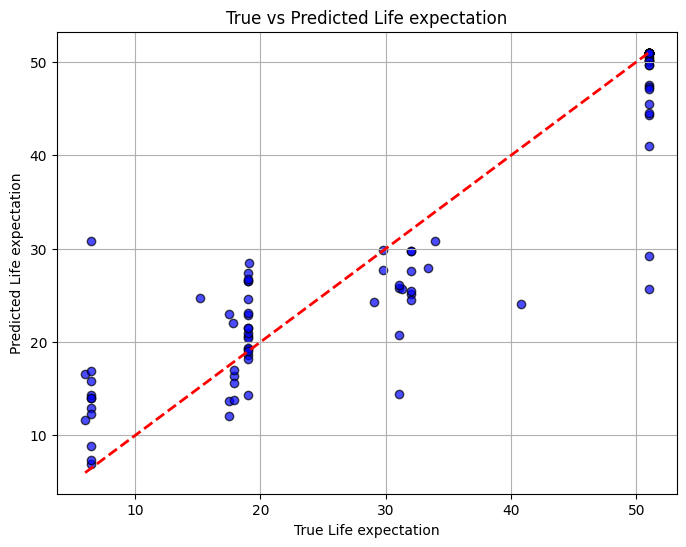

In [130]:
# y_test contains the true Life expectation values
# y_pred_best_rf contains the predicted values from the best model
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Reference line (y = x)
plt.title('True vs Predicted Life expectation')
plt.xlabel('True Life expectation')
plt.ylabel('Predicted Life expectation')
plt.grid(True)
plt.show()
